In [6]:
import re

results = ''
with open('tml_results_rf_final_word.txt', 'r') as f:
    results = f.read()

stats = {}

m = re.finditer(r'[\d]{1,4}:\s([a-zA-Z][^\n]+)\n\n*([^}]*)', results)
for match in m:
    features = match.group(1).split(', ')
    for i, f in enumerate(features):
        if f == 'none':
            f = f'{i}_none'
        if f not in stats:
            stats[f] = {}

    performance = match.group(2).split('\n\n')[0].split('\n')
    for p in performance:
        d = p.split(': ')
        metric = d[0]
        score = float(d[1])

        for i, f in enumerate(features):
            if f == 'none':
                f = f'{i}_none'
            if metric not in stats[f]:
                stats[f][metric] = []

            stats[f][metric].append(score)

In [7]:
stats.keys()

dict_keys(['damerau', 'metaphone2_damerau', 'conc_lev_wordnet', 'spacy_item_similarity', '3_none', 'conc_cos_wordnet', 'conc_lcs_wordnet', '2_none', 'metaphone2_four_cosine', 'metaphone2_four_jaccard', 'metaphone2_four_n_gram', 'metaphone2_four_overlap', 'metaphone2_four_q_gram', 'metaphone2_jw', 'metaphone2_lcs', 'metaphone2_lev', 'metaphone2_metric_lcs', 'metaphone2_normalized_lev', 'metaphone2_osa', 'metaphone2_sift', 'metaphone2_sorensen', 'metaphone2_three_cosine', 'metaphone2_three_jaccard', 'metaphone2_three_n_gram', 'metaphone2_three_overlap', 'metaphone2_three_q_gram', 'metaphone2_two_cosine', 'metaphone2_two_jaccard', 'metaphone2_two_n_gram', 'metaphone2_two_overlap', 'metaphone2_two_q_gram', 'metaphone3_damerau', 'metaphone3_four_cosine', 'metaphone3_four_jaccard', 'metaphone3_four_n_gram', 'metaphone3_four_overlap', 'metaphone3_four_q_gram', 'metaphone3_jw', 'metaphone3_lcs', 'metaphone3_lev', 'metaphone3_metric_lcs', 'metaphone3_normalized_lev', 'metaphone3_osa', 'metaphon

In [13]:
vis_features = [k for k in stats.keys() if not k.startswith('metaphone') and not k.startswith('conc_') and not k.startswith('1') and not k.startswith('2') and not k.startswith('3') and not k.startswith('spacy')]
aur_features = [k for k in stats.keys() if k.startswith('metaphone') or k.startswith('1')]
conc_features = [k for k in stats.keys() if k.startswith('conc_') or k.startswith('2')]
it_features = [k for k in stats.keys() if k.startswith('spacy') or k.startswith('3')]

In [33]:
vis_statistics = {}

for f in vis_features:
    new_f = f
    if f == '0_none':
        new_f = 'none'
    for m in stats[f]:
        if m not in vis_statistics:
            vis_statistics[m] = {}
        if new_f not in vis_statistics[m]:
            vis_statistics[m][new_f] = []

for f in vis_features:
    new_f = f
    if f == '0_none':
        new_f = 'none'
    for m in stats[f]:
        vis_statistics[m][new_f] = stats[f][m]


In [23]:
vis_statistics['accuracy']

{'damerau': [0.6604414261460102,
  0.6595925297113752,
  0.6782682512733447,
  0.6842105263157895,
  0.5237691001697793,
  0.5772495755517827,
  0.633276740237691,
  0.5899830220713073,
  0.6757215619694398,
  0.6544991511035654,
  0.6629881154499151,
  0.6808149405772496,
  0.5033955857385399,
  0.46774193548387094,
  0.5789473684210527,
  0.5585738539898133,
  0.6162988115449916,
  0.6943972835314092,
  0.6638370118845501,
  0.5747028862478778,
  0.5730050933786078,
  0.5747028862478778,
  0.6061120543293718,
  0.6570458404074703,
  0.5033955857385399,
  0.634125636672326,
  0.6816638370118846,
  0.6171477079796265,
  0.5152801358234296,
  0.5246179966044142,
  0.5874363327674024,
  0.6095076400679117,
  0.6179966044142614,
  0.6205432937181664,
  0.5814940577249575,
  0.4906621392190153,
  0.5398981324278438,
  0.5008488964346349,
  0.5458404074702886,
  0.6307300509337861,
  0.6256366723259762,
  0.6595925297113752,
  0.6740237691001698,
  0.6910016977928692,
  0.6595925297113752,


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maxha\AppData\Local\Temp\ipykernel_18092\3689316359.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_18092\3689316359.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_18092\3689316359.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)
C:\Users\maxha\AppData\Local\Temp\ipykernel_18092\3689316359.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  h.set_xticklabels(h.get_xticklabels(), rotation=90)


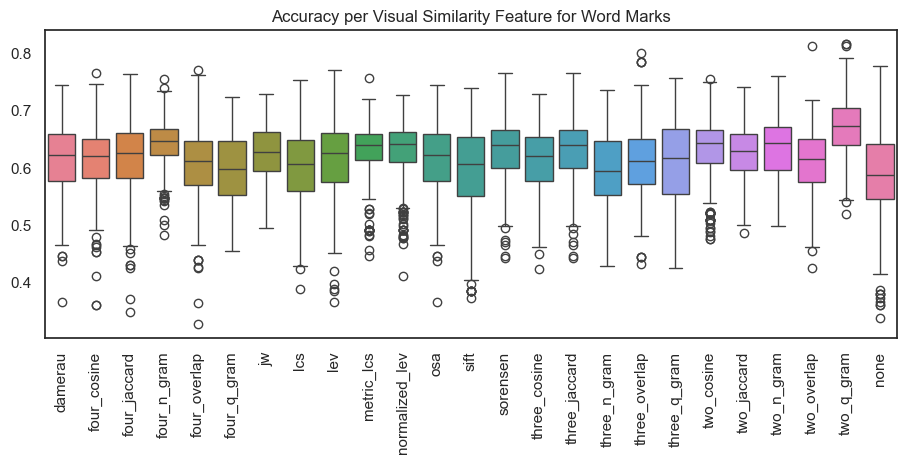

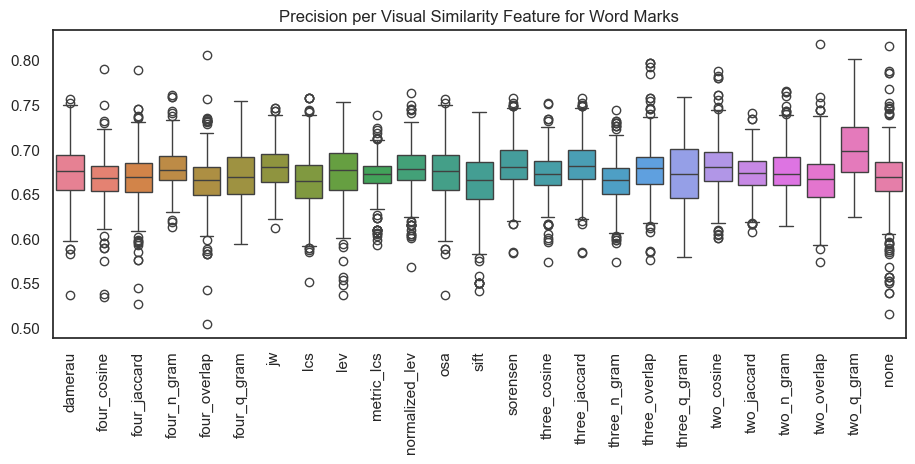

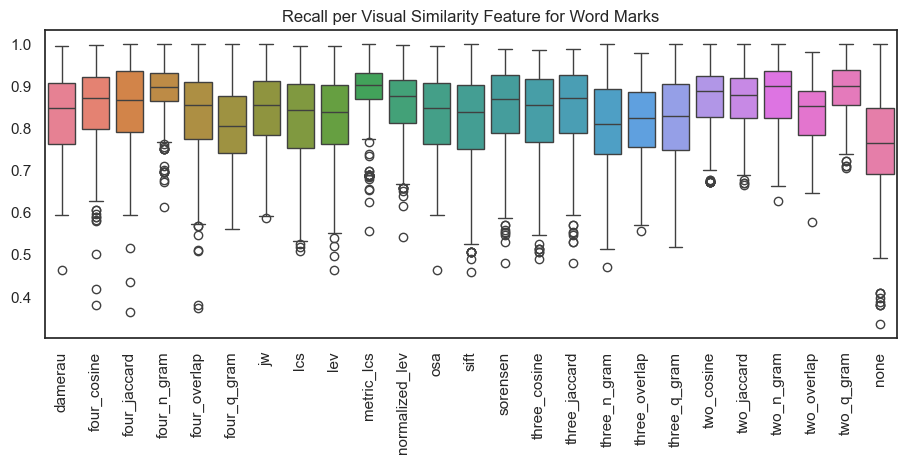

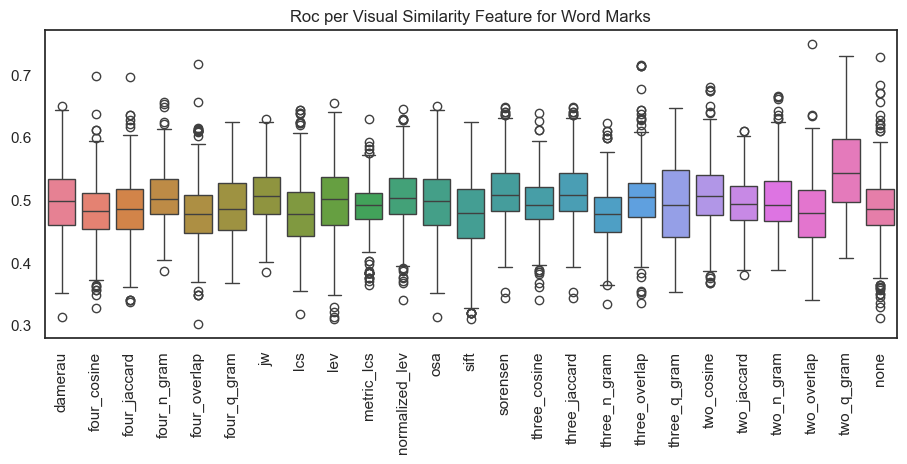

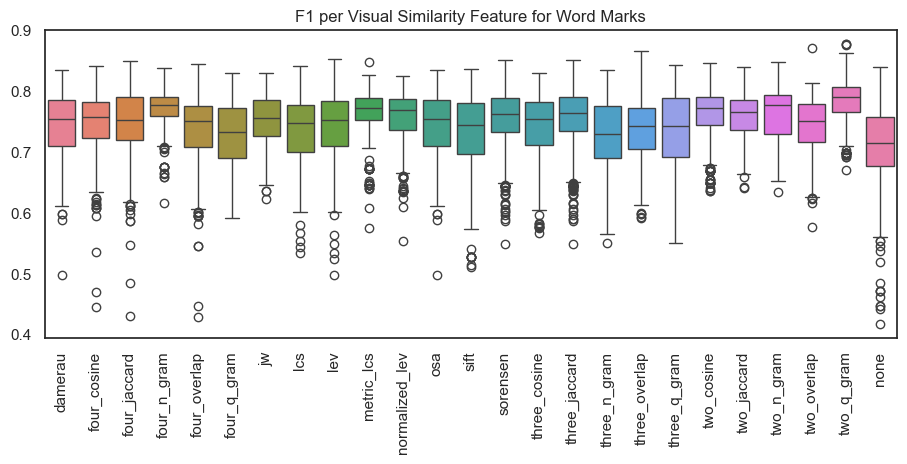

In [35]:
plt.rcParams['axes.grid'] = False


#sns.heatmap(corr, cmap="Greens" ,annot=True, fmt='.4f')
sns.set_theme(style='white')

for m in vis_statistics:
    plt.figure(figsize=(11,4))
    h = sns.boxplot(data=vis_statistics[m])
    h.set_xticklabels(h.get_xticklabels(), rotation=90)
    capital_m = m.capitalize()
    h.set_title(f'{capital_m} per Visual Similarity Feature for Word Marks')
    h.figure.savefig(f'./{m}_per_vis_feature', bbox_inches='tight', pad_inches=0.3)

{'whiskers': [<matplotlib.lines.Line2D at 0x13170f2d1b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13170f5c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13170f2cf10>],
 'medians': [<matplotlib.lines.Line2D at 0x13170f5c5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13170f5c880>],
 'means': []}

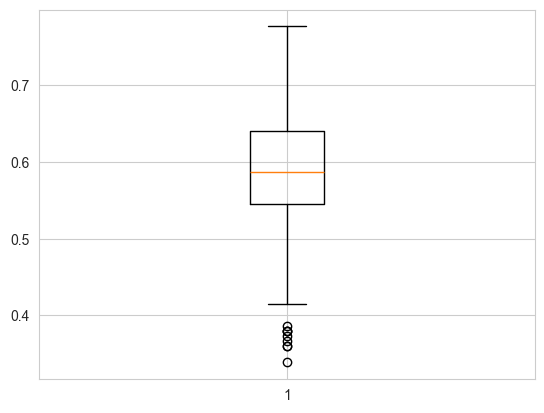